# **Linear Models with US Charities**
### **Data obtained from charitynavigator.org**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('charity_navigator_clean.csv', index_col = 0)

Create a dataframe with no null values.

In [4]:
df = df[df['comp_leader_income'].isnull() == False].reset_index(drop = True)

In [5]:
df.head()

,accountability_score,administrative_expenses,charity_name,charity_url,city,cn_advisory,comp_leader_income,comp_leader_expense_pct,comp_leader_title,excess_or_deficit_for_year,...,net_assets,other_revenue,overall_score,payments_to_affiliates,program_expenses,state,total_contributions,org_type,org_category,org_type_id
0,89.0,164590.0,9to5 National Association of Working Women,https://www.charitynavigator.org/index.cfm?bay...,Milwaukee,NaN,53463.0,3.11,Executive Director,349718.0,...,1350382,49634.0,89.75,0,1440463,WI,1999023,Human and Civil Rights,Advocacy and Education,0.0
1,86.0,1001560.0,'Aha Pūnana Leo,https://www.charitynavigator.org/index.cfm?bay...,Hilo,NaN,73500.0,1.47,Executive Director,1175965.0,...,14773920,382540.0,85.95,0,3912270,HI,3339358,Education,Early Childhood Programs and Services,1.0
2,85.0,93957.0,AID FOR AIDS International,https://www.charitynavigator.org/index.cfm?bay...,New York,NaN,85000.0,0.99,Executive Director,-461502.0,...,-770370,0.0,80.96,0,8157850,NY,8039138,International,Development and Relief Services,2.0
3,86.0,346867.0,Futures in Education,https://www.charitynavigator.org/index.cfm?bay...,Brooklyn,NaN,61220.0,0.78,Acting Executive Director,1872733.0,...,11460087,-81726.0,89.94,0,7018262,NY,9704138,Education,Scholarship and Financial Support,1.0
4,97.0,135195.0,Every Generation Ministries,https://www.charitynavigator.org/index.cfm?bay...,Temecula,NaN,74244.0,5.41,President,-103940.0,...,723772,32436.0,90.62,0,1148407,CA,1234662,Religion,Religious Activities,3.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7290 entries, 0 to 7289
Data columns (total 22 columns):
accountability_score          7290 non-null float64
administrative_expenses       7290 non-null float64
charity_name                  7288 non-null object
charity_url                   7290 non-null object
city                          7289 non-null object
cn_advisory                   4 non-null object
comp_leader_income            7290 non-null float64
comp_leader_expense_pct       7290 non-null float64
comp_leader_title             7290 non-null object
excess_or_deficit_for_year    7290 non-null float64
financial_score               7290 non-null float64
fundraising_expenses          7290 non-null int64
net_assets                    7290 non-null int64
other_revenue                 7290 non-null float64
overall_score                 7290 non-null float64
payments_to_affiliates        7290 non-null int64
program_expenses              7290 non-null int64
state                    

In [7]:
df.describe()

,accountability_score,administrative_expenses,comp_leader_income,comp_leader_expense_pct,excess_or_deficit_for_year,financial_score,fundraising_expenses,net_assets,other_revenue,overall_score,payments_to_affiliates,program_expenses,total_contributions,org_type_id
count,7290.000000,7.290000e+03,7.290000e+03,7290.000000,7.290000e+03,7290.000000,7.290000e+03,7.290000e+03,7.290000e+03,7290.000000,7.290000e+03,7.290000e+03,7.290000e+03,7290.000000
mean,91.338683,1.294414e+06,1.659498e+05,3.543462,9.060532e+05,85.966429,1.070673e+06,3.219307e+07,1.190769e+06,87.178483,1.977978e+04,1.345123e+07,1.286215e+07,5.705898
std,8.873393,6.049582e+06,1.298927e+05,2.384256,1.180910e+07,9.940291,6.142220e+06,1.752289e+08,7.803896e+06,7.777421,2.624573e+05,6.457635e+07,6.028956e+07,2.727216
min,24.000000,9.440000e+02,1.000000e+00,0.000000,-2.691435e+08,0.000000,1.301000e+03,-1.290334e+07,-1.391081e+07,18.950000,-4.101700e+04,7.718300e+04,9.063000e+04,0.000000
25%,89.000000,1.945552e+05,9.155775e+04,1.610000,-2.368478e+05,81.180000,1.605952e+05,2.088086e+06,1.116200e+04,83.730000,0.000000e+00,1.683411e+06,1.701188e+06,4.000000
50%,93.000000,3.732055e+05,1.311865e+05,3.150000,6.882200e+04,87.500000,3.264685e+05,5.658102e+06,1.145770e+05,88.530000,0.000000e+00,3.211320e+06,3.273303e+06,7.000000
75%,97.000000,8.588372e+05,1.977418e+05,5.120000,6.325405e+05,92.500000,7.113882e+05,1.631770e+07,4.977250e+05,92.020000,0.000000e+00,7.953149e+06,7.657308e+06,8.000000
max,100.000000,2.569202e+08,2.013535e+06,9.990000,4.531299e+08,100.000000,3.377669e+08,7.551342e+09,3.903250e+08,100.000000,1.679144e+07,2.499301e+09,2.379130e+09,10.000000


Add dummy variables for organization type.

In [8]:
org_type_dummies = pd.get_dummies(df.org_type)
df = pd.concat([df, org_type_dummies], axis = 1, join = 'outer')

Drop non-numerical variables from the dataframe.

In [9]:
df.drop(['charity_name', 'charity_url', 
          'city', 'cn_advisory', 
          'state', 'org_type',
          'org_category', 'comp_leader_title'], 
         axis = 1, inplace = True)
df.head()

,accountability_score,administrative_expenses,comp_leader_income,comp_leader_expense_pct,excess_or_deficit_for_year,financial_score,fundraising_expenses,net_assets,other_revenue,overall_score,...,"Arts, Culture, Humanities",Community Development,Education,Environment,Health,Human Services,Human and Civil Rights,International,Religion,Research and Public Policy
0,89.0,164590.0,53463.0,3.11,349718.0,90.56,111522,1350382,49634.0,89.75,...,0,0,0,0,0,0,1,0,0,0
1,86.0,1001560.0,73500.0,1.47,1175965.0,85.92,54613,14773920,382540.0,85.95,...,0,0,1,0,0,0,0,0,0,0
2,85.0,93957.0,85000.0,0.99,-461502.0,77.65,248833,-770370,0.0,80.96,...,0,0,0,0,0,0,0,1,0,0
3,86.0,346867.0,61220.0,0.78,1872733.0,97.50,384550,11460087,-81726.0,89.94,...,0,0,1,0,0,0,0,0,0,0
4,97.0,135195.0,74244.0,5.41,-103940.0,87.08,87436,723772,32436.0,90.62,...,0,0,0,0,0,0,0,0,1,0


## **Predicting compensation leader income for US charities**

### **Train Test Split**

In [10]:
from sklearn.model_selection import train_test_split

All numerical features including org type dummy variables are included (with the exception of compensation leader expense percent).

In [11]:
feature_names = ['accountability_score', 'financial_score',
                 'overall_score', 'administrative_expenses',
                 'excess_or_deficit_for_year', 'fundraising_expenses',
                 'net_assets', 'other_revenue',
                 'payments_to_affiliates', 'Animals',
                 'Arts, Culture, Humanities', 'Community Development',
                 'Education', 'Environment',
                 'Health', 'Human Services',
                 'Human and Civil Rights', 'International',
                 'Religion', 'Research and Public Policy']
X = df[feature_names]
y = df['comp_leader_income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 101)

### **Standard Scaler**

First use a standard scaler to level all features in the model.

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Create a dataframe to see scaled features.

In [14]:
df_scaled = pd.DataFrame(X_train_scaled, columns = X.columns)
df_scaled.head()

,accountability_score,financial_score,overall_score,administrative_expenses,excess_or_deficit_for_year,fundraising_expenses,net_assets,other_revenue,payments_to_affiliates,Animals,"Arts, Culture, Humanities",Community Development,Education,Environment,Health,Human Services,Human and Civil Rights,International,Religion,Research and Public Policy
0,0.523977,0.794084,0.977527,1.416871,0.934873,0.885268,0.290553,-0.089992,-0.075257,-0.243064,2.419876,-0.325487,-0.283784,-0.235588,-0.336121,-0.640713,-0.207767,-0.268927,-0.237206,-0.145763
1,0.971347,0.136413,0.490523,-0.150319,-0.210251,0.024736,-0.116007,-0.299356,-0.075257,-0.243064,-0.413244,-0.325487,-0.283784,-0.235588,-0.336121,1.560762,-0.207767,-0.268927,-0.237206,-0.145763
2,0.971347,-0.355110,0.046528,-0.101158,-0.043167,-0.106470,-0.118849,-0.136323,-0.075257,4.114150,-0.413244,-0.325487,-0.283784,-0.235588,-0.336121,-0.640713,-0.207767,-0.268927,-0.237206,-0.145763
3,-3.166823,-2.782065,-3.394119,-0.120767,-0.111231,-0.074416,-0.147770,-0.153193,-0.075257,-0.243064,-0.413244,-0.325487,-0.283784,-0.235588,-0.336121,1.560762,-0.207767,-0.268927,-0.237206,-0.145763
4,0.188450,0.008835,0.227415,0.377612,-0.450363,0.032822,0.547113,0.209070,-0.075257,-0.243064,2.419876,-0.325487,-0.283784,-0.235588,-0.336121,-0.640713,-0.207767,-0.268927,-0.237206,-0.145763


### **Linear Regression**

#### *Will multiple linear regression allow for an accurate model to predict compensation leader income?*

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Instantiate LinearRegression() and fit our data to a new model.

In [16]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled).round().astype(int)

19 test values and 2 predicted values are above 700,000 and not included in the visualization.


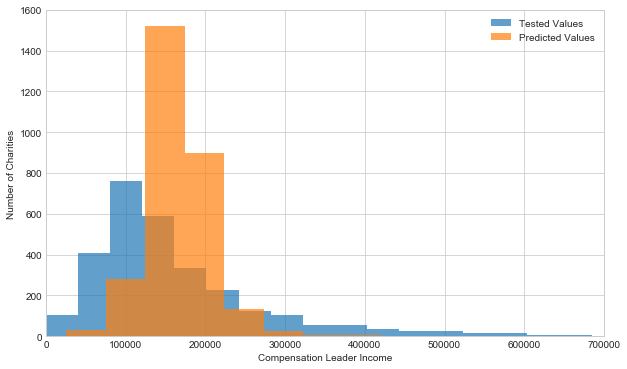

In [17]:
print('{} test values and {} predicted values are above 700,000 and not included in the visualization.' \
      .format(len(y_test[y_test >= 700000]), len(y_pred[y_pred >= 700000])))

sns.set_style("whitegrid")
plt.figure(figsize = (10, 6))

plt.hist(y_test, bins = 50, alpha = 0.7)
plt.hist(y_pred, bins = 50, alpha = 0.7)
plt.xlabel('Compensation Leader Income')
plt.ylabel('Number of Charities')
plt.legend(['Tested Values', 'Predicted Values'], loc = 'best')
plt.xlim(0, 700000);

*Is there a linear relationship between our test values and our predicted values?*

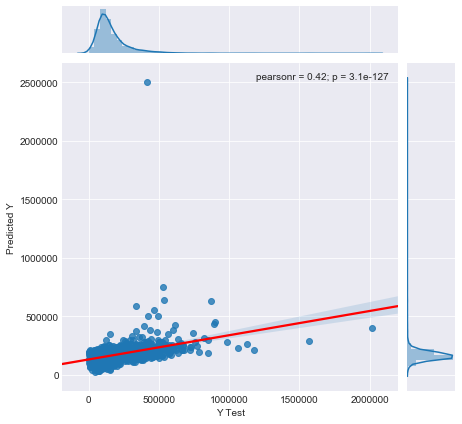

In [18]:
sns.set_style("darkgrid")

ax = sns.jointplot(x = y_test, y = y_pred, 
                   kind = 'reg', size = 6, ratio = 6);
ax.set_axis_labels('Y Test', 'Predicted Y')
regline = ax.ax_joint.get_lines()[0]
regline.set_color('red')

*What is the distribution of our prediction errors?*

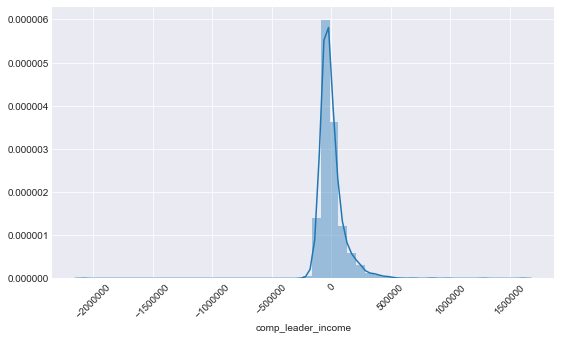

In [19]:
sns.set_style("darkgrid")
plt.figure(figsize = (9, 5))

ax = sns.distplot((y_test - y_pred), bins = 50)
ax.xaxis.set_tick_params(which = 'both', rotation = 45)

In [20]:
print('multiple Linear Regression Coefficients\nPolynomial Degree 1\nAlpha = 0')
print('Intercept:', linreg.intercept_.round(4))
print('Total Non-Zero Coefficients: {}\n'.format(len(linreg.coef_.round(4))))
cdf = pd.DataFrame(linreg.coef_.round(4), X.columns, columns = ['Coefficient'])
print(cdf)

multiple Linear Regression Coefficients
Polynomial Degree 1
Alpha = 0
Intercept: 165355.8902
Total Non-Zero Coefficients: 20

                             Coefficient
accountability_score        1.623731e+04
financial_score             6.258948e+03
overall_score              -8.354225e+02
administrative_expenses     3.385637e+04
excess_or_deficit_for_year  7.084418e+03
fundraising_expenses        4.260454e+03
net_assets                  1.065589e+03
other_revenue               1.695243e+04
payments_to_affiliates      1.301773e+04
Animals                     1.069318e+17
Arts, Culture, Humanities   1.644563e+17
Community Development       1.371251e+17
Education                   1.223674e+17
Environment                 1.039945e+17
Health                      1.407099e+17
Human Services              2.116420e+17
Human and Civil Rights      9.279797e+16
International               1.168489e+17
Religion                    1.046327e+17
Research and Public Policy  6.650151e+16


*What is the average magnitude of the coefficients in this model?*

In [21]:
abs(cdf['Coefficient']).mean().round(4)

6.8400404476219816e+16

*Which coefficient in this model has the strongest magnitude?*

In [22]:
cdf[cdf['Coefficient'] == abs(cdf['Coefficient']).max()]

,Coefficient
Human Services,2.116420e+17


In [23]:
print('Train R^2:', linreg.score(X_train_scaled, y_train).round(4))
print('Test  R^2:', linreg.score(X_test_scaled, y_test).round(4))
print('MAE:      ', metrics.mean_absolute_error(y_test, y_pred).round(4))
print('MSE:      ', metrics.mean_squared_error(y_test, y_pred).round(4))
print('RMSE:     ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(4))

Train R^2: 0.2478
Test  R^2: 0.175
MAE:       71917.2075
MSE:       13494225760.5737
RMSE:      116164.6494


At 0.175, our Test $R^2$ score is very low.

*Will changing the polynomial degree allow for an increase in our model score?*

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

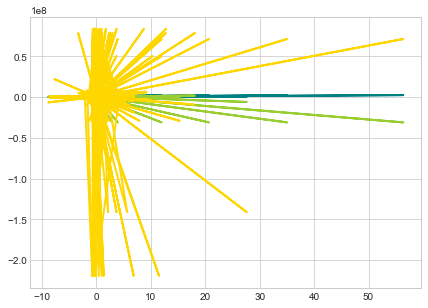

In [25]:
sns.set_style("whitegrid")
plt.figure(figsize = (7, 5))
    
colors = ['teal', 'yellowgreen', 'gold']
for i, degree in enumerate([1, 2, 3]):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    plt.plot(X_test_scaled, y_pred, color = colors[i], lw = 2,
             label = "degree %d" % degree)

In [26]:
n = [1, 2, 3]
i = 0
for n in n:
    poly = PolynomialFeatures(degree = n)
    X_poly_train = poly.fit_transform(X_train_scaled)
    linreg = LinearRegression()
    linreg = linreg.fit(X_poly_train, y_train)
    y_pred = linreg.predict(poly.fit_transform(X_test_scaled))
#     print('Multiple Linear Regression, Polynomial Degree {} | coeff (w):\n{}'.format(n, linreg.coef_.round(4)))
#     print('Multiple Linear Regression, Polynomial Degree {} |  intercept (b): {:.4f}'.format(n, linreg.intercept_.round(4)))
    print('Multiple Linear Regression, Polynomial Degree {} | R^2 Train: {:.4f}'.format(n, linreg.score(X_poly_train, y_train).round(4)))
    print('Multiple Linear Regression, Polynomial Degree {} | R^2  Test: {:.4f}'.format(n, linreg.score(poly.fit_transform(X_test_scaled), y_test).round(4)))
    i+=1

Multiple Linear Regression, Polynomial Degree 1 | R^2 Train: 0.2478
Multiple Linear Regression, Polynomial Degree 1 | R^2  Test: 0.1754
Multiple Linear Regression, Polynomial Degree 2 | R^2 Train: 0.5936
Multiple Linear Regression, Polynomial Degree 2 | R^2  Test: -21.3741
Multiple Linear Regression, Polynomial Degree 3 | R^2 Train: 0.7927
Multiple Linear Regression, Polynomial Degree 3 | R^2  Test: -1927.0639


Using a multiple linear regression, polynomial degree 1 produces our best Test $R^2$ score at 0.1754.

As this value is quite low, let's see if another type of linear model will allow for an increase.

### **Ridge Regression**

#### *Will a ridge regression allow for an accurate model to predict compensation leader income?*

In [27]:
from sklearn.linear_model import Ridge

Let's see how our choice of alpha effects our training and testing $R^2$ scores.

Instantiate Ridge() and fit our data to a list of choices for alpha, printing our $R^2$ scores for each model fit.

In [28]:
print('Ridge regression: effect of alpha regularization parameter \
with polynomial degree 1\n')
r2_train_dic = {}
r2_test_dic = {}
for this_alpha in [0, 1, 10, 20, 50, 100, 200, 
                   250, 500, 750, 1000, 1050, 
                   1100, 1200, 1300, 1400, 2000]:
    linridge = Ridge(alpha = this_alpha)
    linridge.fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_train_dic[this_alpha] = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    r2_test_dic[this_alpha] = linridge.score(X_test_scaled, y_test)
    num_coeff = 0
    n = 0
    for coefficient in linridge.coef_:
        if abs(linridge.coef_[n]) > 1.0:
            num_coeff+=1
            n+=1
        else:
            n+=1
    print('Alpha = {}\nnum abs(coeff) > 1.0: {}, \
    Train R^2: {:.4f}, Test R^2: {:.4f}\n'
         .format(this_alpha, num_coeff, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter with polynomial degree 1

Alpha = 0
num abs(coeff) > 1.0: 20,     Train R^2: 0.2478, Test R^2: 0.1754

Alpha = 1
num abs(coeff) > 1.0: 20,     Train R^2: 0.2478, Test R^2: 0.1755

Alpha = 10
num abs(coeff) > 1.0: 20,     Train R^2: 0.2478, Test R^2: 0.1761

Alpha = 20
num abs(coeff) > 1.0: 20,     Train R^2: 0.2478, Test R^2: 0.1766

Alpha = 50
num abs(coeff) > 1.0: 20,     Train R^2: 0.2478, Test R^2: 0.1783

Alpha = 100
num abs(coeff) > 1.0: 20,     Train R^2: 0.2477, Test R^2: 0.1807

Alpha = 200
num abs(coeff) > 1.0: 20,     Train R^2: 0.2474, Test R^2: 0.1844

Alpha = 250
num abs(coeff) > 1.0: 20,     Train R^2: 0.2472, Test R^2: 0.1858

Alpha = 500
num abs(coeff) > 1.0: 20,     Train R^2: 0.2461, Test R^2: 0.1906

Alpha = 750
num abs(coeff) > 1.0: 20,     Train R^2: 0.2448, Test R^2: 0.1928

Alpha = 1000
num abs(coeff) > 1.0: 20,     Train R^2: 0.2434, Test R^2: 0.1937

Alpha = 1050
num abs(coeff) > 1.0: 20,     Train R^2

Almost every choice for alpha above produced an $R^2$ score over 0.174 (highest score for multiple linear regression).

These results suggest that a model other than multiple linear regression will be more accurate.

*With a ridge regression of polynomial degree 1, how does our choice of alpha effect training and testing $R^2$ scores?*

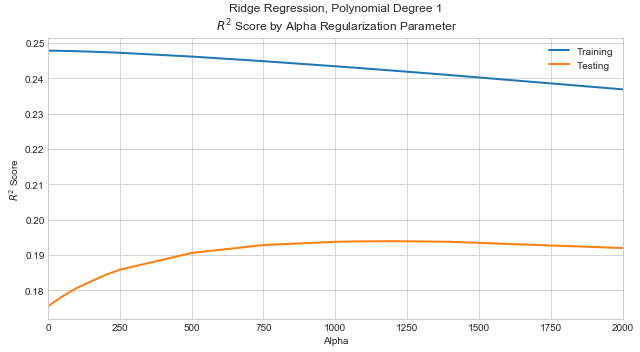

In [29]:
sns.set_style("whitegrid")
plt.figure(figsize = (9, 5))

plt.plot(r2_train_dic.keys(), r2_train_dic.values(),
         r2_test_dic.keys(), r2_test_dic.values(), lw = 2)
plt.xlabel('Alpha')
plt.ylabel('$R^2$ Score')
plt.title('Ridge Regression, Polynomial Degree 1\n \
$R^2$ Score by Alpha Regularization Parameter')
plt.legend(['Training', 'Testing'], loc = 'best')
plt.xlim(0, 2000)

plt.tight_layout()

The line graph above suggests that an increase alpha will lead to an increase in Test R^2, though this return will diminish within an increase of just 0.02.

Let's instantiate Ridge(), choosing the alpha value that produced the highest test $R^2$ score.

In [30]:
linridge = Ridge(alpha = 1100)
linridge.fit(X_train_scaled, y_train)
y_pred = linridge.predict(X_test_scaled)

19 test values and 1 predicted values are above 700,000 and not included in the visualization.


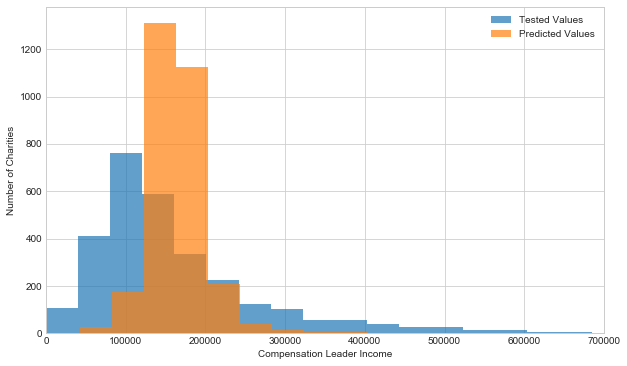

In [31]:
print('{} test values and {} predicted values are above 700,000 and not included in the visualization.' \
      .format(len(y_test[y_test >= 700000]), len(y_pred[y_pred >= 700000])))

sns.set_style("whitegrid")
plt.figure(figsize = (10, 6))

plt.hist(y_test, bins = 50, alpha = 0.7)
plt.hist(y_pred, bins = 50, alpha = 0.7)
plt.xlabel('Compensation Leader Income')
plt.ylabel('Number of Charities')
plt.legend(['Tested Values', 'Predicted Values'], loc = 'best')
plt.xlim(0, 700000);

*Is there a linear relationship between our test values and our predicted values?*

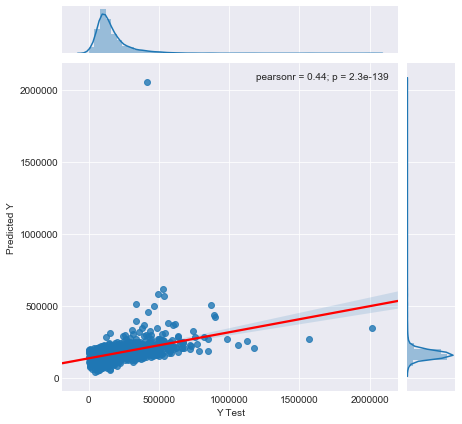

In [32]:
sns.set_style("darkgrid")

ax = sns.jointplot(x = y_test, y = y_pred, 
                   kind = 'reg', size = 6, ratio = 6);
ax.set_axis_labels('Y Test', 'Predicted Y')
regline = ax.ax_joint.get_lines()[0]
regline.set_color('red')

*What is the distribution of our prediction errors?*

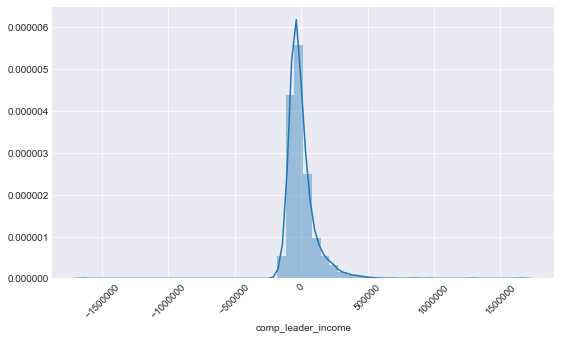

In [33]:
sns.set_style("darkgrid")
plt.figure(figsize = (9, 5))

ax = sns.distplot((y_test - y_pred), bins = 50)
ax.xaxis.set_tick_params(which = 'both', rotation = 45)

In [34]:
print('Ridge Regression Coefficients\nPolynomial Degree 1\nAlpha = 1100')
print('Intercept:', linridge.intercept_.round(4))
print('Total Non-Zero Coefficients: {}\n'.format(len(linridge.coef_.round(4))))
cdf = pd.DataFrame(linridge.coef_.round(4), X.columns, columns = ['Coefficient'])
print(cdf)

Ridge Regression Coefficients
Polynomial Degree 1
Alpha = 1100
Intercept: 165361.4236
Total Non-Zero Coefficients: 20

                            Coefficient
accountability_score         10121.4808
financial_score                987.7402
overall_score                 5784.7226
administrative_expenses      23173.9055
excess_or_deficit_for_year    6529.3449
fundraising_expenses          7135.2141
net_assets                    8741.7675
other_revenue                14017.9927
payments_to_affiliates       10772.6394
Animals                      -1472.4958
Arts, Culture, Humanities    11538.6587
Community Development        -3560.6335
Education                     3896.5063
Environment                  -1722.1607
Health                        4373.3001
Human Services              -10044.0676
Human and Civil Rights        1407.8409
International                  480.2411
Religion                     -7123.0913
Research and Public Policy    7809.1653


*What is the average magnitude of the coefficients in this model?*

In [35]:
abs(cdf['Coefficient']).mean().round(4)

7034.6484

*Which coefficient in this model has the strongest magnitude?*

In [36]:
cdf[cdf['Coefficient'] == abs(cdf['Coefficient']).max()]

,Coefficient
administrative_expenses,23173.9055


In [37]:
print('Train R^2:', linridge.score(X_train_scaled, y_train).round(4))
print('Test  R^2:', linridge.score(X_test_scaled, y_test).round(4))
print('MAE:      ', metrics.mean_absolute_error(y_test, y_pred).round(4))
print('MSE:      ', metrics.mean_squared_error(y_test, y_pred).round(4))
print('RMSE:     ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(4))

Train R^2: 0.2428
Test  R^2: 0.1939
MAE:       72376.2684
MSE:       13185212438.7425
RMSE:      114826.8803


Using ridge regression with an optimized alpha, our test $R^2$ of 0.1939 outperforms our previous best of 0.175 (highest score for multiple linear regression).

So far, a ridge regression at polynomial degree 1 is the top performer.

Though a polynomial degree of 1 had the highest test $R^2$ score for multiple linear regression, this may not be the case using a different linear model.

Let's see if a ridge regression using another polynomial degree will allow for an even better test $R^2$ score.

Instantiate Ridge() and fit our data to a list of choices for the polynomial degree, printing our $R^2$ scores for each model fit.

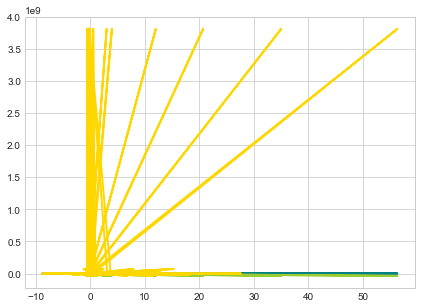

In [38]:
sns.set_style("whitegrid")
plt.figure(figsize = (7, 5))

colors = ['teal', 'yellowgreen', 'gold']
for i, degree in enumerate([1, 2, 3]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    plt.plot(X_test_scaled, y_pred, color = colors[i], lw = 2,
             label = "degree %d" % degree)

In [39]:
n = [1, 2, 3]
i = 0
for n in n:
    poly = PolynomialFeatures(degree = n)
    X_poly_train = poly.fit_transform(X_train_scaled)
    linridge = Ridge(alpha = 1100)
    linridge.fit(X_poly_train, y_train)
    y_pred = linridge.predict(poly.fit_transform(X_test_scaled))
#     print('Ridge Regression, Polynomial Degree {} | coeff (w):\n{}'.format(n, linridge.coef_.round(4)))
#     print('Ridge Regression, Polynomial Degree {} |  intercept (b): {:.4f}'.format(n, linridge.intercept_.round(4)))
    print('Ridge Regression, Polynomial Degree {} | R^2 Train: {:.4f}'.format(n, linridge.score(X_poly_train, y_train).round(4)))
    print('Ridge Regression, Polynomial Degree {} | R^2  Test: {:.4f}'.format(n, linridge.score(poly.fit_transform(X_test_scaled), y_test).round(4)))
    i+=1

Ridge Regression, Polynomial Degree 1 | R^2 Train: 0.2428
Ridge Regression, Polynomial Degree 1 | R^2  Test: 0.1939
Ridge Regression, Polynomial Degree 2 | R^2 Train: 0.4551
Ridge Regression, Polynomial Degree 2 | R^2  Test: 0.2157
Ridge Regression, Polynomial Degree 3 | R^2 Train: 0.6236
Ridge Regression, Polynomial Degree 3 | R^2  Test: -814.9419


The ridge regression with a polynomial degree of 2 produced the highest test $R^2$ score, and the cubic model performed the worst.

Let's repeat our alpha optimization loop using a quadratic fit for our polynomial degree.

With a ridge regression of polynomial degree 2, how does our choice of alpha effect training and testing $R^2$ scores

In [40]:
print('Ridge regression: effect of alpha regularization parameter \
with polynomial degree 2\n')
r2_train_dic = {}
r2_test_dic = {}
for this_alpha in [0, 1, 10, 20, 50, 100, 200, 250, 500, 
                   750, 1000, 1050, 1100, 1200, 1300, 1400,
                   1900, 1950, 1955, 1956, 1957, 1958, 1959, 
                   1960, 1965, 1975, 2000]:
    poly = PolynomialFeatures(degree = 2)
    X_poly_train = poly.fit_transform(X_train_scaled)
    linridge = Ridge(alpha = this_alpha)
    linridge.fit(X_poly_train, y_train)
    r2_train = linridge.score(X_poly_train, y_train).round(4)
    r2_train_dic[this_alpha] = linridge.score(X_poly_train, y_train).round(4)
    r2_test = linridge.score(poly.fit_transform(X_test_scaled), y_test).round(4)
    r2_test_dic[this_alpha] = linridge.score(poly.fit_transform(X_test_scaled), y_test).round(4)
    num_coeff = 0
    n = 0
    for coefficient in linridge.coef_:
        if abs(linridge.coef_[n]) > 1.0:
            num_coeff+=1
            n+=1
        else:
            n+=1
    print('Alpha = {}\nnum abs(coeff) > 1.0: {}, \
    Train R^2: {:.4f}, Test R^2: {:.4f}\n'
         .format(this_alpha, num_coeff, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter with polynomial degree 2

Alpha = 0
num abs(coeff) > 1.0: 231,     Train R^2: 0.5904, Test R^2: -22.4861

Alpha = 1
num abs(coeff) > 1.0: 230,     Train R^2: 0.5922, Test R^2: -29.7434

Alpha = 10
num abs(coeff) > 1.0: 230,     Train R^2: 0.5859, Test R^2: -25.4788

Alpha = 20
num abs(coeff) > 1.0: 230,     Train R^2: 0.5815, Test R^2: -17.9135

Alpha = 50
num abs(coeff) > 1.0: 230,     Train R^2: 0.5717, Test R^2: -7.9238

Alpha = 100
num abs(coeff) > 1.0: 230,     Train R^2: 0.5591, Test R^2: -3.3176

Alpha = 200
num abs(coeff) > 1.0: 230,     Train R^2: 0.5395, Test R^2: -1.1937

Alpha = 250
num abs(coeff) > 1.0: 230,     Train R^2: 0.5313, Test R^2: -0.8293

Alpha = 500
num abs(coeff) > 1.0: 230,     Train R^2: 0.5001, Test R^2: -0.1581

Alpha = 750
num abs(coeff) > 1.0: 230,     Train R^2: 0.4781, Test R^2: 0.0691

Alpha = 1000
num abs(coeff) > 1.0: 230,     Train R^2: 0.4610, Test R^2: 0.1853

Alpha = 1050
num abs(coeff) 

Optimizing alpha with a quadratic fit, produces the highest test $R^2$ scores we've seen yet.

The highest test $R^2$ score of 0.3059, is much higher than our previous best score of 0.1939.

*With a ridge regression of polynomial degree 2, how does our choice of alpha effect training and testing $R^2$ scores?*

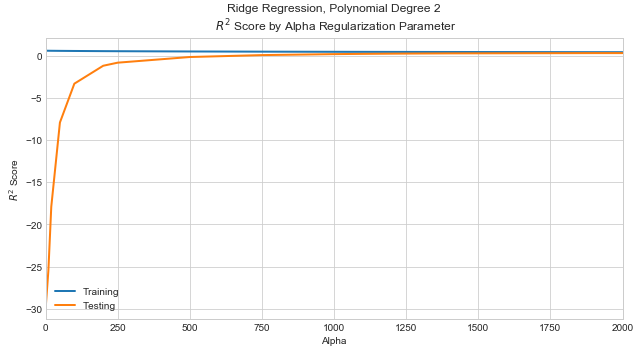

In [41]:
sns.set_style('whitegrid')
plt.figure(figsize = (9, 5))

plt.plot(r2_train_dic.keys(), r2_train_dic.values(),
         r2_test_dic.keys(), r2_test_dic.values(), lw = 2)
plt.xlabel('Alpha')
plt.ylabel('$R^2$ Score')
plt.title('Ridge Regression, Polynomial Degree 2\n \
$R^2$ Score by Alpha Regularization Parameter')
plt.legend(['Training', 'Testing'], loc = 'best')
plt.xlim(0, 2000)

plt.tight_layout()

The line graph above suggests that an increase alpha will bring the test $R^2$ score above 0, though this return will diminish soon after the values become positive.

Let's instantiate Ridge() with a quadratic fit, choosing the alpha value that produced the highest test $R^2$ score.

In [42]:
poly = PolynomialFeatures(degree = 2)
X_poly_train = poly.fit_transform(X_train_scaled)
linridge = Ridge(alpha = 1960)
linridge.fit(X_poly_train, y_train)
y_pred = linridge.predict(poly.fit_transform(X_test_scaled))

19 test values and 9 predicted values are above 700,000 and not included in the visualization.


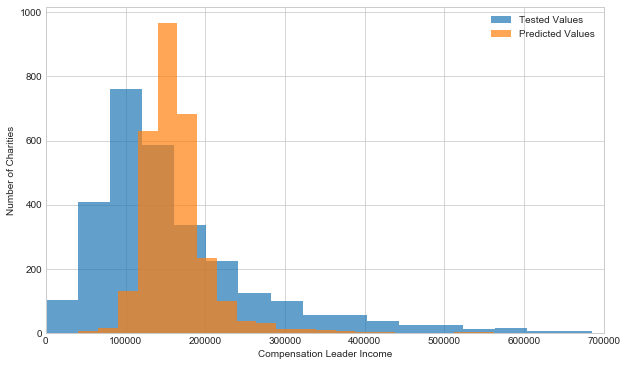

In [43]:
print('{} test values and {} predicted values are above 700,000 and not included in the visualization.' \
      .format(len(y_test[y_test >= 700000]), len(y_pred[y_pred >= 700000])))

sns.set_style("whitegrid")
plt.figure(figsize = (10, 6))

plt.hist(y_test, bins = 50, alpha = 0.7)
plt.hist(y_pred, bins = 50, alpha = 0.7)
plt.xlabel('Compensation Leader Income')
plt.ylabel('Number of Charities')
plt.legend(['Tested Values', 'Predicted Values'], loc = 'best')
plt.xlim(0, 700000);

*Is there a linear relationship between our test values and our predicted values?*

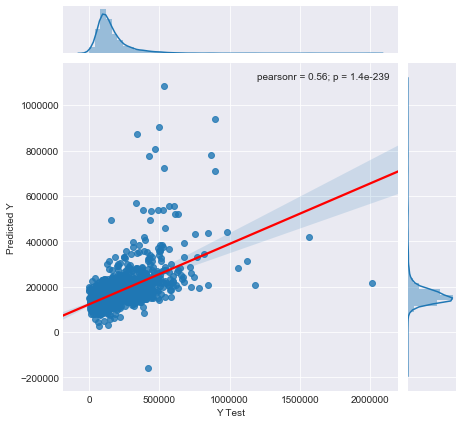

In [44]:
sns.set_style("darkgrid")

ax = sns.jointplot(x = y_test, y = y_pred, 
                   kind = 'reg', size = 6, ratio = 6);
ax.set_axis_labels('Y Test', 'Predicted Y')
regline = ax.ax_joint.get_lines()[0]
regline.set_color('red')

*What is the distribution of our prediction errors?*

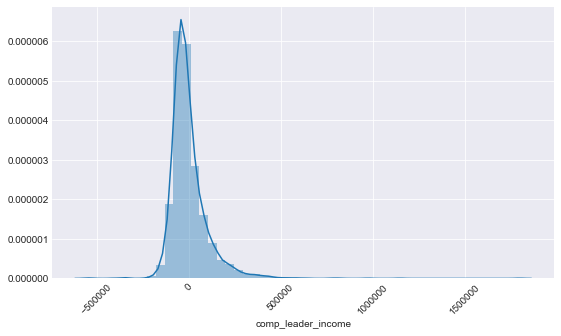

In [45]:
sns.set_style("darkgrid")
plt.figure(figsize = (9, 5))

ax = sns.distplot((y_test - y_pred), bins = 50)
ax.xaxis.set_tick_params(which = 'both', rotation = 45)

Let's create a new dictionary to see all non-zero coefficients in our current model.

In [46]:
coeff_dic = {}
n = 0
for coef_ in linridge.coef_:
    if abs(linridge.coef_[n].round(4)) != 0:
        coeff_dic[poly.get_feature_names(feature_names)[n]] = linridge.coef_[n].round(4)
        n+=1
    else:
        n+=1

In [47]:
import json

In [48]:
print('Ridge Regression Coefficients\nPolynomial Degree 2\nAlpha = 1960')
print('Intercept:', linridge.intercept_.round(4))
print('Total Non-Zero Coefficients: {}\n'.format(len(coeff_dic)))
print(json.dumps(coeff_dic, indent = 1))

Ridge Regression Coefficients
Polynomial Degree 2
Alpha = 1960
Intercept: 157744.825
Total Non-Zero Coefficients: 230

{
 "accountability_score": 7825.3143,
 "financial_score": 1315.1673,
 "overall_score": 4768.8589,
 "administrative_expenses": 30019.6426,
 "excess_or_deficit_for_year": 4377.9743,
 "fundraising_expenses": 17957.739,
 "net_assets": 20314.4347,
 "other_revenue": 15547.4023,
 "payments_to_affiliates": 4291.3063,
 "Animals": 60.9388,
 "Arts, Culture, Humanities": 2663.2378,
 "Community Development": -202.1484,
 "Education": 555.883,
 "Environment": 29.8543,
 "Health": 968.7245,
 "Human Services": -2949.1145,
 "Human and Civil Rights": 148.3104,
 "International": 191.4792,
 "Religion": -489.6523,
 "Research and Public Policy": 226.0762,
 "accountability_score^2": -1189.8319,
 "accountability_score financial_score": -921.8483,
 "accountability_score overall_score": -829.7131,
 "accountability_score administrative_expenses": 2860.6172,
 "accountability_score excess_or_deficit

*What is the average magnitude of the coefficients in this model?*

In [49]:
abs(linridge.coef_).mean().round(4)

1760.7652

*Which coefficient in this model has the strongest magnitude?*

In [50]:
for coefficient, correlation in coeff_dic.items():
    if correlation == abs(linridge.coef_).max().round(4):
        print('{}: {}'.format(coefficient, correlation))

administrative_expenses: 30019.6426


In [51]:
print('Train R^2:', linridge.score(X_poly_train, y_train).round(4))
print('Test  R^2:', linridge.score(poly.fit_transform(X_test_scaled), y_test).round(4))
print('MAE:      ', metrics.mean_absolute_error(y_test, y_pred).round(4))
print('MSE:      ', metrics.mean_squared_error(y_test, y_pred).round(4))
print('RMSE:     ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(4))

Train R^2: 0.4164
Test  R^2: 0.3059
MAE:       68241.5026
MSE:       11353707799.7163
RMSE:      106553.7789


In fitting our data to a quadratic model with a new optimized alpha, our test $R^2$ of 0.3059 outperforms our previous best test $R^2$ score of 0.1939 by a large margin.

A ridge regression at polynomial degree 2 is now our top performer.

Let's see if a lasso regression will allow for an even better test $R^2$ score than a ridge regression.


### **Lasso Regression**

##### *Will a lasso regression allow for an accurate model to predict compensation leader income?*

In [52]:
from sklearn.linear_model import Lasso

Let's see how our choice of alpha effects our training and testing $R^2$ scores.

Instantiate Lasso() and fit our data to a list of choices for alpha, printing our $R^2$ scores for each model fit.

In [53]:
print('Lasso regression: effect of alpha regularization parameter \
with polynomial degree 1\n')
r2_train_dic = {}
r2_test_dic = {}
for this_alpha in [0, 1, 10, 20, 50, 75, 100, 200, 250, 
                   500, 750, 1000, 2000, 3000, 4000, 5000]:
    linlasso = Lasso(alpha = this_alpha)
    linlasso.fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_train_dic[this_alpha] = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    r2_test_dic[this_alpha] = linlasso.score(X_test_scaled, y_test)
    num_coeff = 0
    n = 0   
    for coefficient in linlasso.coef_:
        if abs(linlasso.coef_[n]) > 1.0:
            num_coeff+=1
            n+=1
        else:
            n+=1
    print('Alpha = {}\nnum abs(coeff) > 1.0: {}, \
    Train R^2: {:.4f}, Test R^2: {:.4f}\n'
         .format(this_alpha, num_coeff, r2_train, r2_test))

Lasso regression: effect of alpha regularization parameter with polynomial degree 1

Alpha = 0
num abs(coeff) > 1.0: 20,     Train R^2: 0.2478, Test R^2: 0.1754

Alpha = 1
num abs(coeff) > 1.0: 20,     Train R^2: 0.2478, Test R^2: 0.1754

Alpha = 10
num abs(coeff) > 1.0: 20,     Train R^2: 0.2478, Test R^2: 0.1754

Alpha = 20
num abs(coeff) > 1.0: 19,     Train R^2: 0.2478, Test R^2: 0.1754

Alpha = 50
num abs(coeff) > 1.0: 18,     Train R^2: 0.2478, Test R^2: 0.1754

Alpha = 75
num abs(coeff) > 1.0: 18,     Train R^2: 0.2478, Test R^2: 0.1754

Alpha = 100
num abs(coeff) > 1.0: 18,     Train R^2: 0.2478, Test R^2: 0.1754

Alpha = 200
num abs(coeff) > 1.0: 19,     Train R^2: 0.2478, Test R^2: 0.1752

Alpha = 250
num abs(coeff) > 1.0: 19,     Train R^2: 0.2477, Test R^2: 0.1752

Alpha = 500
num abs(coeff) > 1.0: 19,     Train R^2: 0.2475, Test R^2: 0.1748

Alpha = 750
num abs(coeff) > 1.0: 18,     Train R^2: 0.2472, Test R^2: 0.1743

Alpha = 1000
num abs(coeff) > 1.0: 18,     Train R^2: 

Starting with a polynomial degree of 1 while varying our choice for alpha, test $R^2$ scores are hovering at our previous high for multiple linear regression of 0.174.

We'll need to adjust the polynomial degree to see if a lasso regression can compete with a ridge regression to predict compensation leader income.

*With a lasso regression of polynomial degree 1, how does our choice of alpha effect training and testing $R^2$ scores?*

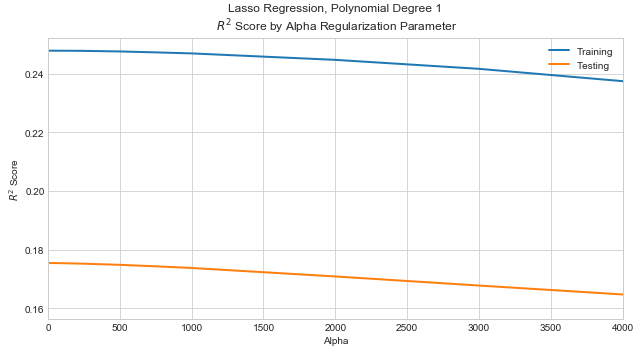

In [54]:
sns.set_style("whitegrid")
plt.figure(figsize = (9, 5))

plt.plot(r2_train_dic.keys(), r2_train_dic.values(),
         r2_test_dic.keys(), r2_test_dic.values(), lw = 2)
plt.xlabel('Alpha')
plt.ylabel('$R^2$ Score')
plt.title('Lasso Regression, Polynomial Degree 1\n \
$R^2$ Score by Alpha Regularization Parameter')
plt.legend(['Training', 'Testing'], loc = 'best')
plt.xlim(0, 4000)

plt.tight_layout()

The line graph above suggests that an increase alpha will not increase the test $R^2$ score at all.

Since an alpha choice of 0.174 is far below scores we've gotten from other models, a lasso regression with a polynomial degree of 1 should not be used.

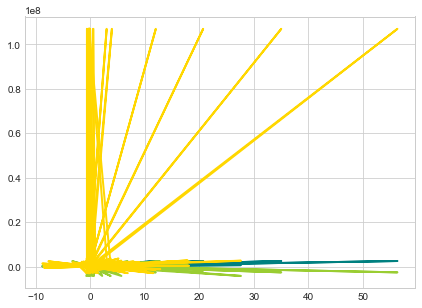

In [55]:
sns.set_style("whitegrid")
plt.figure(figsize = (7, 5))

colors = ['teal', 'yellowgreen', 'gold']
for i, degree in enumerate([1, 2, 3]):
    model = make_pipeline(PolynomialFeatures(degree), Lasso())
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    plt.plot(X_test_scaled, y_pred, color = colors[i], lw = 2,
             label = "degree %d" % degree)

In [56]:
n = [1, 2, 3, 4]
i = 0
for n in n:
    poly = PolynomialFeatures(degree = n)
    X_poly_train = poly.fit_transform(X_train_scaled)
    linlasso = Lasso(alpha = 1960)
    linlasso.fit(X_poly_train, y_train)
    y_pred = linlasso.predict(poly.fit_transform(X_test_scaled))
#     print('Lasso Regression, Polynomial Degree {} | coeff (w):\n{}'.format(n, linlasso.coef_.round(4)))
#     print('Lasso Regression, Polynomial Degree {} |  intercept (b): {:.4f}'.format(n, linlasso.intercept_.round(4)))
    print('Lasso Regression, Polynomial Degree {} | R^2 Train: {:.4f}'.format(n, linlasso.score(X_poly_train, y_train).round(4)))
    print('Lasso Regression, Polynomial Degree {} | R^2  Test: {:.4f}'.format(n, linlasso.score(poly.fit_transform(X_test_scaled), y_test).round(4)))
    i+=1

Lasso Regression, Polynomial Degree 1 | R^2 Train: 0.2448
Lasso Regression, Polynomial Degree 1 | R^2  Test: 0.1710
Lasso Regression, Polynomial Degree 2 | R^2 Train: 0.5067
Lasso Regression, Polynomial Degree 2 | R^2  Test: 0.2775
Lasso Regression, Polynomial Degree 3 | R^2 Train: 0.5813
Lasso Regression, Polynomial Degree 3 | R^2  Test: 0.3015
Lasso Regression, Polynomial Degree 4 | R^2 Train: 0.6467
Lasso Regression, Polynomial Degree 4 | R^2  Test: -228.6690


The lasso regression with a polynomial degree of 3 produced the highest test $R^2$ score at 0.5813, and the quadratic model performed second best at 0.2775.

This $R^2$ score beats our previous best of 0.3059 by a large margin.

Let's repeat our alpha optimization loop first using a quadratic fit for our polynomial degree, and then the cubic fit to compare.

*With a lasso regression of polynomial degree 2, how does our choice of alpha effect training and testing $R^2$ scores?*

In [57]:
print('Lasso regression: effect of alpha regularization parameter \
with polynomial degree 2\n')
r2_train_dic = {}
r2_test_dic = {}
for this_alpha in [0, 1, 10, 20, 50, 100, 200, 250, 500, 750, 1000, 
                   1050, 1100, 1200, 1300, 1400, 1900, 1950, 2000, 
                   2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 
                   2900, 3000, 3100, 3200, 3210, 3120, 3230, 3240, 
                   3250, 3260, 3270, 3280, 3290, 3300, 3350, 3400, 
                   3500, 3600, 3700, 3800, 3900, 4000]:
    poly = PolynomialFeatures(degree = 2)
    X_poly_train = poly.fit_transform(X_train_scaled)
    linlasso = Lasso(alpha = this_alpha)
    linlasso.fit(X_poly_train, y_train)
    r2_train = linlasso.score(X_poly_train, y_train).round(4)
    r2_train_dic[this_alpha] = linlasso.score(X_poly_train, y_train).round(4)
    r2_test = linlasso.score(poly.fit_transform(X_test_scaled), y_test).round(4)
    r2_test_dic[this_alpha] = linlasso.score(poly.fit_transform(X_test_scaled), y_test).round(4)
    num_coeff = 0
    n = 0
    for coefficient in linlasso.coef_:
        if abs(linlasso.coef_[n]) > 1.0:
            num_coeff+=1
            n+=1
        else:
            n+=1
    print('Alpha = {}\nnum abs(coeff) > 1.0: {}, \
    Train R^2: {:.4f}, Test R^2: {:.4f}\n'
         .format(this_alpha, num_coeff, r2_train, r2_test))

Lasso regression: effect of alpha regularization parameter with polynomial degree 2

Alpha = 0
num abs(coeff) > 1.0: 230,     Train R^2: 0.5855, Test R^2: -0.4039

Alpha = 1
num abs(coeff) > 1.0: 194,     Train R^2: 0.5855, Test R^2: -0.4017

Alpha = 10
num abs(coeff) > 1.0: 164,     Train R^2: 0.5851, Test R^2: -0.3785

Alpha = 20
num abs(coeff) > 1.0: 151,     Train R^2: 0.5845, Test R^2: -0.3712

Alpha = 50
num abs(coeff) > 1.0: 139,     Train R^2: 0.5827, Test R^2: -0.3165

Alpha = 100
num abs(coeff) > 1.0: 126,     Train R^2: 0.5793, Test R^2: -0.2879

Alpha = 200
num abs(coeff) > 1.0: 121,     Train R^2: 0.5716, Test R^2: -0.2283

Alpha = 250
num abs(coeff) > 1.0: 112,     Train R^2: 0.5682, Test R^2: -0.2757

Alpha = 500
num abs(coeff) > 1.0: 90,     Train R^2: 0.5552, Test R^2: -0.1559

Alpha = 750
num abs(coeff) > 1.0: 80,     Train R^2: 0.5462, Test R^2: 0.0079

Alpha = 1000
num abs(coeff) > 1.0: 71,     Train R^2: 0.5377, Test R^2: 0.1213

Alpha = 1050
num abs(coeff) > 1.0: 

*With a lasso regression of polynomial degree 2, how does our choice of alpha effect training and testing $R^2$ scores?*

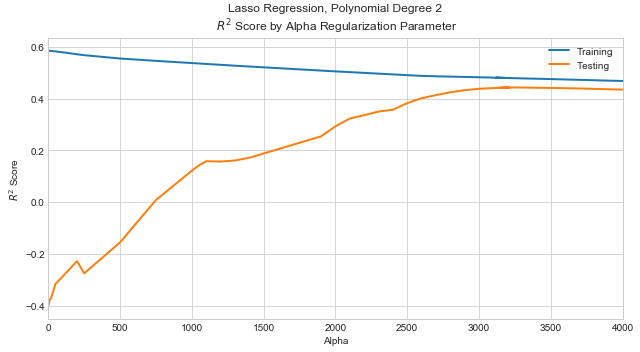

In [58]:
sns.set_style("whitegrid")
plt.figure(figsize = (9, 5))

plt.plot(r2_train_dic.keys(), r2_train_dic.values(),
         r2_test_dic.keys(), r2_test_dic.values(), lw = 2)
plt.xlabel('Alpha')
plt.ylabel('$R^2$ Score')
plt.title('Lasso Regression, Polynomial Degree 2\n \
$R^2$ Score by Alpha Regularization Parameter')
plt.legend(['Training', 'Testing'], loc = 'best')
plt.xlim(0, 4000)

plt.tight_layout()

The line graph above suggests that an increase alpha will bring the test $R^2$ score above 0 with a steady slope.

The test $R^2$ score will continue to steadily increasing until an alpha value of 3,240 is reached.

Let's instantiate Lasso() with a quadratic fit, choosing the alpha value that produced the highest test $R^2$ score.

In [59]:
poly = PolynomialFeatures(degree = 2)
X_poly_train = poly.fit_transform(X_train_scaled)
linlasso = Lasso(alpha = 3240)
linlasso.fit(X_poly_train, y_train)
y_pred = linlasso.predict(poly.fit_transform(X_test_scaled))

19 test values and 12 predicted values are above 700,000 and not included in the visualization.


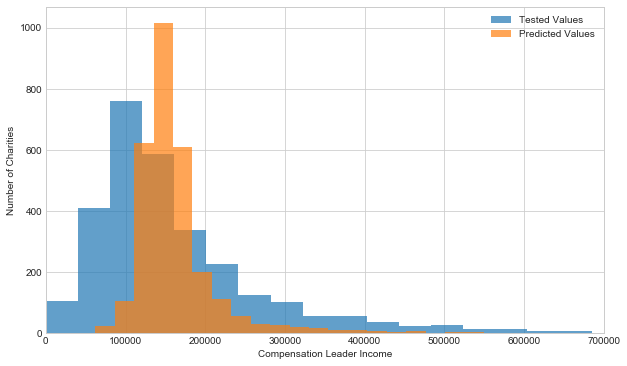

In [60]:
print('{} test values and {} predicted values are above 700,000 and not included in the visualization.' \
      .format(len(y_test[y_test >= 700000]), len(y_pred[y_pred >= 700000])))

sns.set_style("whitegrid")
plt.figure(figsize = (10, 6))

plt.hist(y_test, bins = 50, alpha = 0.7)
plt.hist(y_pred, bins = 50, alpha = 0.7)
plt.xlabel('Compensation Leader Income')
plt.ylabel('Number of Charities')
plt.legend(['Tested Values', 'Predicted Values'], loc = 'best')
plt.xlim(0, 700000);

*Is there a linear relationship between our test values and our predicted values?*

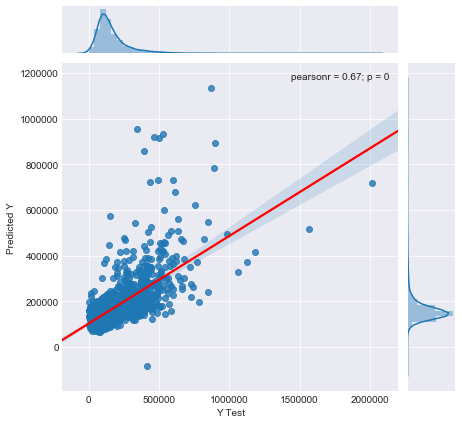

In [61]:
sns.set_style("darkgrid")

ax = sns.jointplot(x = y_test, y = y_pred, 
                   kind = 'reg', size = 6, ratio = 6);
ax.set_axis_labels('Y Test', 'Predicted Y')
regline = ax.ax_joint.get_lines()[0]
regline.set_color('red')

*What is the distribution of our prediction errors?*

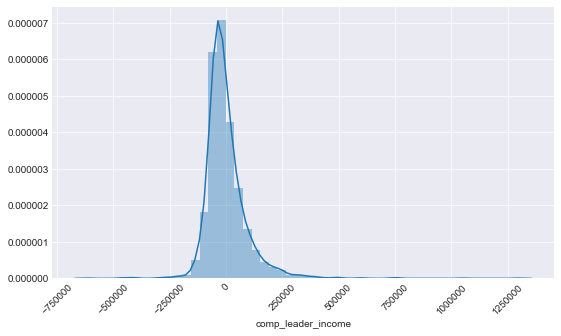

In [62]:
sns.set_style("darkgrid")
plt.figure(figsize = (9, 5))

ax = sns.distplot((y_test - y_pred), bins = 50)
ax.xaxis.set_tick_params(which = 'both', rotation = 45)

Let's create a new dictionary to see all non-zero coefficients in our current model.

In [63]:
coeff_dic = {}
n = 0
for coef_ in linlasso.coef_:
    if abs(linlasso.coef_[n].round(4)) != 0:
        coeff_dic[poly.get_feature_names(feature_names)[n]] = linlasso.coef_[n].round(4)
        n+=1
    else:
        n+=1

In [64]:
print('Lasso Regression Coefficients\nPolynomial Degree 2\nAlpha = 3240')
print('Intercept:', linlasso.intercept_.round(4))
print('Total Non-Zero Coefficients: {}\n'.format(len(coeff_dic)))
print(json.dumps(coeff_dic, indent = 1))

Lasso Regression Coefficients
Polynomial Degree 2
Alpha = 3240
Intercept: 159384.202
Total Non-Zero Coefficients: 34

{
 "accountability_score": 5734.7489,
 "overall_score": 4043.1914,
 "administrative_expenses": 106495.0843,
 "fundraising_expenses": 37331.5353,
 "net_assets": 52384.0536,
 "Human Services": -1402.6108,
 "accountability_score Religion": -46.2892,
 "financial_score^2": -262.8574,
 "financial_score Arts, Culture, Humanities": 400.6122,
 "administrative_expenses^2": -2613.4857,
 "administrative_expenses excess_or_deficit_for_year": 2713.6101,
 "administrative_expenses fundraising_expenses": -1916.7147,
 "administrative_expenses net_assets": -1324.7394,
 "excess_or_deficit_for_year^2": 61.3399,
 "excess_or_deficit_for_year net_assets": -398.166,
 "excess_or_deficit_for_year other_revenue": -1405.507,
 "fundraising_expenses^2": -749.9348,
 "fundraising_expenses net_assets": -1111.222,
 "fundraising_expenses other_revenue": 765.653,
 "fundraising_expenses Health": 731.2099,
 

*What is the average magnitude of the coefficients in this model?*

In [65]:
abs(linlasso.coef_).mean().round(4)

1136.9566

*Which coefficient in this model has the strongest magnitude?*

In [66]:
for coefficient, correlation in coeff_dic.items():
    if correlation == abs(linlasso.coef_).max().round(4):
        print('{}: {}'.format(coefficient, correlation))

administrative_expenses: 106495.0843


In [67]:
print('Train R^2:', linlasso.score(X_poly_train, y_train).round(4))
print('Test  R^2:', linlasso.score(poly.fit_transform(X_test_scaled), y_test).round(4))
print('MAE:      ', metrics.mean_absolute_error(y_test, y_pred).round(4))
print('MSE:      ', metrics.mean_squared_error(y_test, y_pred).round(4))
print('RMSE:     ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(4))

Train R^2: 0.4792
Test  R^2: 0.4433
MAE:       61695.078
MSE:       9104749687.7809
RMSE:      95418.812


Now let's see how an cubic model compares to a quadratic model.

If our test $R^2$ scores are consistent with our previous model projections, then the cubic model should perform the best.

*With a lasso regression of polynomial degree 3, how does our choice of alpha effect training and testing $R^2$ scores?*

In [68]:
print('Lasso regression: effect of alpha regularization parameter \
with polynomial degree 3\n')
r2_train_dic = {}
r2_test_dic = {}
for this_alpha in [0, 1, 10, 20, 50, 100, 200, 250, 500, 750, 1000, 
                   1050, 1100, 1200, 1300, 1400, 1900, 1950, 2000, 
                   2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 
                   2900, 3000, 3100, 3200, 3300, 3400, 3450, 3460, 
                   3470, 3480, 3490, 3500, 3550, 3600, 3700, 3800, 
                   3900, 4000]:
    poly = PolynomialFeatures(degree = 3)
    X_poly_train = poly.fit_transform(X_train_scaled)
    linlasso = Lasso(alpha = this_alpha)
    linlasso.fit(X_poly_train, y_train)
    r2_train = linlasso.score(X_poly_train, y_train).round(4)
    r2_train_dic[this_alpha] = linlasso.score(X_poly_train, y_train).round(4)
    r2_test = linlasso.score(poly.fit_transform(X_test_scaled), y_test).round(4)
    r2_test_dic[this_alpha] = linlasso.score(poly.fit_transform(X_test_scaled), y_test).round(4)
    num_coeff = 0
    n = 0
    for coefficient in linlasso.coef_:
        if abs(linlasso.coef_[n]) > 1.0:
            num_coeff+=1
            n+=1
        else:
            n+=1
    print('Alpha = {}\nnum abs(coeff) > 1.0: {}, \
    Train R^2: {:.4f}, Test R^2: {:.4f}\n'
         .format(this_alpha, num_coeff, r2_train, r2_test))

Lasso regression: effect of alpha regularization parameter with polynomial degree 3

Alpha = 0
num abs(coeff) > 1.0: 1729,     Train R^2: 0.7124, Test R^2: -237.7981

Alpha = 1
num abs(coeff) > 1.0: 1269,     Train R^2: 0.7122, Test R^2: -239.1172

Alpha = 10
num abs(coeff) > 1.0: 831,     Train R^2: 0.7094, Test R^2: -200.5326

Alpha = 20
num abs(coeff) > 1.0: 725,     Train R^2: 0.7057, Test R^2: -177.5447

Alpha = 50
num abs(coeff) > 1.0: 615,     Train R^2: 0.6979, Test R^2: -138.8481

Alpha = 100
num abs(coeff) > 1.0: 519,     Train R^2: 0.6888, Test R^2: -95.4825

Alpha = 200
num abs(coeff) > 1.0: 419,     Train R^2: 0.6741, Test R^2: -61.6009

Alpha = 250
num abs(coeff) > 1.0: 388,     Train R^2: 0.6686, Test R^2: -51.4857

Alpha = 500
num abs(coeff) > 1.0: 301,     Train R^2: 0.6450, Test R^2: -20.6359

Alpha = 750
num abs(coeff) > 1.0: 247,     Train R^2: 0.6264, Test R^2: -8.2272

Alpha = 1000
num abs(coeff) > 1.0: 215,     Train R^2: 0.6119, Test R^2: -1.0821

Alpha = 1050
n

*With a lasso regression of polynomial degree 3, how does our choice of alpha effect training and testing $R^2$ scores?*

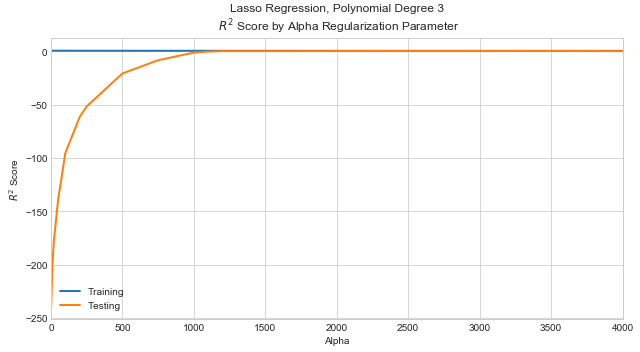

In [69]:
sns.set_style("whitegrid")
plt.figure(figsize = (9, 5))

plt.plot(r2_train_dic.keys(), r2_train_dic.values(),
         r2_test_dic.keys(), r2_test_dic.values(), lw = 2)
plt.xlabel('Alpha')
plt.ylabel('$R^2$ Score')
plt.title('Lasso Regression, Polynomial Degree 3\n \
$R^2$ Score by Alpha Regularization Parameter')
plt.legend(['Training', 'Testing'], loc = 'best')
plt.xlim(0, 4000)

plt.tight_layout()

The line graph above suggests that an increase alpha will bring the test $R^2$ score above 0 with a sharp slope.

The test $R^2$ score will continue to steadily increase until an alpha value of 3,490 is reached.

Let's instantiate Lasso() with an cubic fit, choosing the alpha value that produced the highest test $R^2$ score.

In [70]:
poly = PolynomialFeatures(degree = 3)
X_poly_train = poly.fit_transform(X_train_scaled)
linlasso = Lasso(alpha = 3490)
linlasso.fit(X_poly_train, y_train)
y_pred = linlasso.predict(poly.fit_transform(X_test_scaled))

19 test values and 9 predicted values are above 700,000 and not included in the visualization.


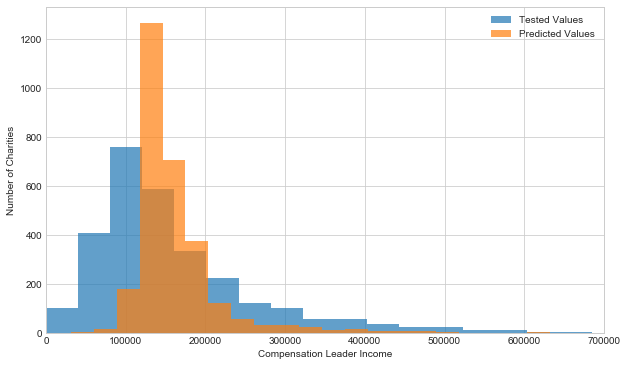

In [71]:
print('{} test values and {} predicted values are above 700,000 and not included in the visualization.' \
      .format(len(y_test[y_test >= 700000]), len(y_pred[y_pred >= 700000])))

sns.set_style("whitegrid")
plt.figure(figsize = (10, 6))

plt.hist(y_test, bins = 50, alpha = 0.7)
plt.hist(y_pred, bins = 50, alpha = 0.7)
plt.xlabel('Compensation Leader Income')
plt.ylabel('Number of Charities')
plt.legend(['Tested Values', 'Predicted Values'], loc = 'best')
plt.xlim(0, 700000);

*Is there a linear relationship between our test values and our predicted values?*

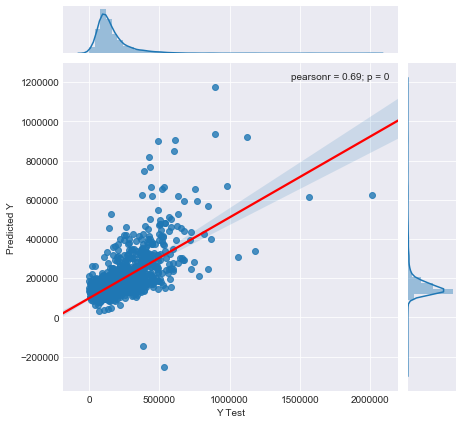

In [72]:
sns.set_style("darkgrid")

ax = sns.jointplot(x = y_test, y = y_pred, 
                   kind = 'reg', size = 6, ratio = 6);
ax.set_axis_labels('Y Test', 'Predicted Y')
regline = ax.ax_joint.get_lines()[0]
regline.set_color('red')

*What is the distribution of our prediction errors?*

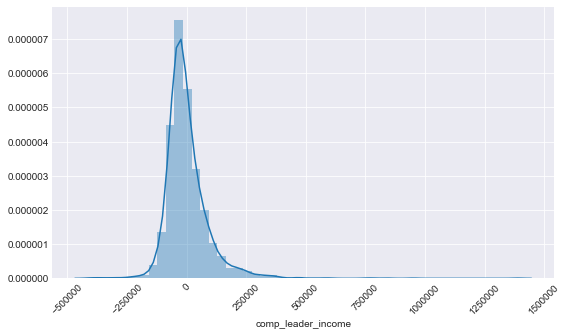

In [73]:
sns.set_style("darkgrid")
plt.figure(figsize = (9, 5))

ax = sns.distplot((y_test - y_pred), bins = 50)
ax.xaxis.set_tick_params(which = 'both', rotation = 45)

Let's create a new dictionary to see all non-zero coefficients in our current model.

In [74]:
coeff_dic = {}
n = 0
for coef_ in linlasso.coef_:
    if abs(linlasso.coef_[n].round(4)) != 0:
        coeff_dic[poly.get_feature_names(feature_names)[n]] = linlasso.coef_[n].round(4)
        n+=1
    else:
        n+=1

In [75]:
print('Lasso Regression Coefficients\nPolynomial Degree 3\nAlpha = 3490')
print('Intercept:', linlasso.intercept_.round(4))
print('Total Non-Zero Coefficients: {}\n'.format(len(coeff_dic)))
print(json.dumps(coeff_dic, indent = 1))

Lasso Regression Coefficients
Polynomial Degree 3
Alpha = 3490
Intercept: 154074.3852
Total Non-Zero Coefficients: 122

{
 "administrative_expenses": 2344.327,
 "administrative_expenses^2": -9467.3007,
 "excess_or_deficit_for_year^2": 84.9675,
 "net_assets other_revenue": -2699.6167,
 "payments_to_affiliates^2": 147.1534,
 "accountability_score^3": 59.3089,
 "accountability_score^2 Health": 2004.0533,
 "accountability_score financial_score^2": 188.3887,
 "accountability_score net_assets^2": -330.3584,
 "accountability_score net_assets other_revenue": -133.2912,
 "accountability_score Animals^2": 533.8217,
 "accountability_score Environment^2": 270.2074,
 "accountability_score Health^2": 2840.5475,
 "accountability_score Human Services^2": 1217.8196,
 "accountability_score Human and Civil Rights^2": 570.0217,
 "accountability_score International^2": 309.7583,
 "accountability_score Religion^2": 4.8765,
 "accountability_score Research and Public Policy^2": -19.8167,
 "financial_score^3":

*What is the average magnitude of the coefficients in this model?*

In [76]:
abs(linlasso.coef_).mean().round(4)

151.3728

*Which coefficient in this model has the strongest magnitude?*

In [77]:
for coefficient, correlation in coeff_dic.items():
    if correlation == abs(linlasso.coef_).max().round(4):
        print('{}: {}'.format(coefficient, correlation))

administrative_expenses Human Services^2: 50164.4125


In [78]:
print('Train R^2:', linlasso.score(X_poly_train, y_train).round(4))
print('Test  R^2:', linlasso.score(poly.fit_transform(X_test_scaled), y_test).round(4))
print('MAE:      ', metrics.mean_absolute_error(y_test, y_pred).round(4))
print('MSE:      ', metrics.mean_squared_error(y_test, y_pred).round(4))
print('RMSE:     ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(4))

Train R^2: 0.5446
Test  R^2: 0.4632
MAE:       60620.6667
MSE:       8780061413.8975
RMSE:      93701.9819


The cubic lasso regression with an optimized alpha has produced the highest test $R^2$ score yet!

This test $R^2$ score is 0.4632, compared to the quadratic lasso regression score of 0.4433.